In [9]:
import pandas as pd

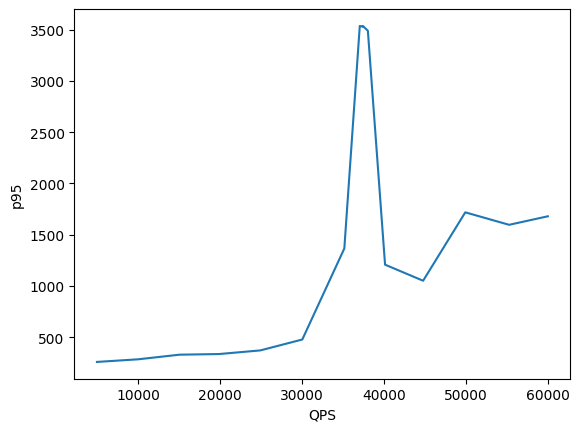

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_file(file):
    df = pd.read_csv(f"./data/{file}")
    df.columns = [col.strip() for col in df.columns]
    sns.lineplot(x="QPS", y="p95", data=df)

plot_file("cpu_run1_int.csv")
    





Index(['#type', 'avg', 'std', 'min', 'p5', 'p10', 'p50', 'p67', 'p75', 'p80',
       'p85', 'p90', 'p95', 'p99', 'p999', 'p9999', 'QPS', 'target'],
      dtype='object')

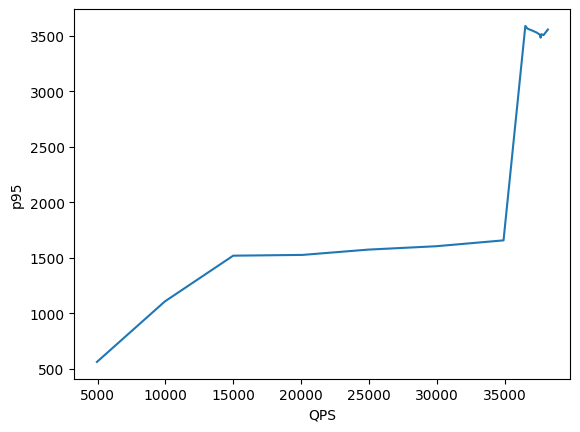

In [16]:
plot_file("cpu_run2_int.csv")



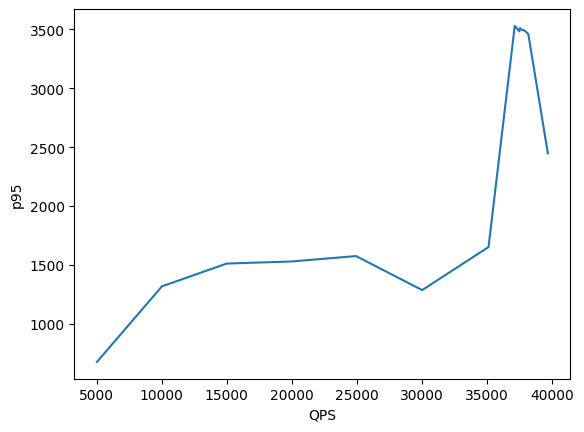

In [17]:
plot_file("cpu_run3_int.csv")


In [18]:
df = pd.read_csv(f"./data/cpu_run2_int.csv")


In [19]:
df['QPS']

0      4955.4
1      9956.2
2     14992.0
3     20094.4
4     24935.0
5     29941.4
6     34909.2
7     38175.0
8     37855.6
9     36675.8
10    37347.7
11    37581.8
12    37688.8
13    37020.2
14    36515.6
15    37644.6
Name: QPS, dtype: float64